In [1]:
# For auto-reloading extenrnal modules see
# http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Imports.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from data_utils import CSVData
from dynamical_systems import linear_system, andronov_hopf, vec_andronov_hopf, vec_roessler_attractor
from nets import EulerN
from torch.utils.data import DataLoader
from utils import euler, plot_phase_portrait, plot_3d_trajectory, train_valid_loader, extract_min_max, plot_bifurcation

# 1. Linear system.

In [3]:
# Choose your network parameters.
input_size=2
num_param=1
hidden_size=20
h=1

# Initialise the model.
model = EulerN(input_size, num_param, hidden_size, h)

In [4]:
# Load data.
dataset = CSVData(csv_file_path='first_model.csv')
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

In [5]:
# Loss & optimizer.
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)

# Losses
train_losses = []
val_losses = []

for epoch in range(10):  # loop over the dataset multiple times

    train_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, params, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs, params)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    val_loss = 0.0
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, params, labels = data

            # forward + loss 
            outputs = model(inputs, params)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
        
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    print('[Epoch: %d] training loss: %.9f  validation loss: %.9f' %
            (epoch + 1, train_loss,val_loss))
    
            

print('Finished Training')

[1,  2000] loss: 0.040243207
[1,  4000] loss: 0.000154997
[1,  6000] loss: 0.000058614
[1,  8000] loss: 0.000032102
[1, 10000] loss: 0.000023774
[2,  2000] loss: 0.000020346
[2,  4000] loss: 0.000017452
[2,  6000] loss: 0.000014171
[2,  8000] loss: 0.000011478
[2, 10000] loss: 0.000009938
[3,  2000] loss: 0.000009551
[3,  4000] loss: 0.000009124
[3,  6000] loss: 0.000008347
[3,  8000] loss: 0.000007397
[3, 10000] loss: 0.000006538
[4,  2000] loss: 0.000005395
[4,  4000] loss: 0.000004838
[4,  6000] loss: 0.000004675
[4,  8000] loss: 0.000004644
[4, 10000] loss: 0.000004581
[5,  2000] loss: 0.000004516
[5,  4000] loss: 0.000004411
[5,  6000] loss: 0.000004373
[5,  8000] loss: 0.000004333
[5, 10000] loss: 0.000004304
[6,  2000] loss: 0.000004333
[6,  4000] loss: 0.000004397
[6,  6000] loss: 0.000004470
[6,  8000] loss: 0.000004541
[6, 10000] loss: 0.000004608
[7,  2000] loss: 0.000004666
[7,  4000] loss: 0.000004735
[7,  6000] loss: 0.000004763
[7,  8000] loss: 0.000004705
[7, 10000] los

In [ ]:
plt.plot(train_losses[2:])
plt.plot(val_losses[2:])
plt.show()

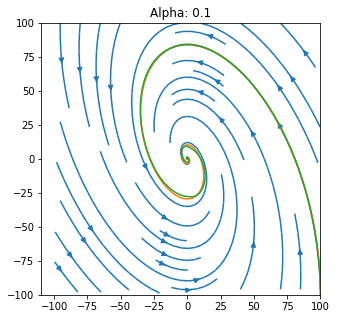

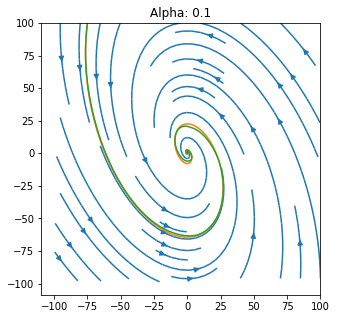

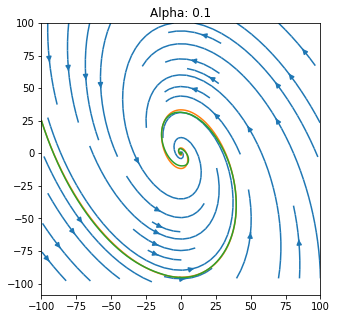

In [6]:
alpha = 0.1

plot_phase_portrait(linear_system, alpha, model, 100, [ 100, -100])
plot_phase_portrait(linear_system, alpha, model, 100, [- 75,  100])
plot_phase_portrait(linear_system, alpha, model, 100, [-100,   25])

# 2. Andronov-Hopf system

In [7]:
# Choose your network parameters.
input_size=2
num_param=1
hidden_size=100
h=1
num_hidden_layers=3

# Initialise the model.
model = EulerN(input_size, num_param, hidden_size, h, num_hidden_layers)

In [8]:
# Load data.
dataset = CSVData(csv_file_path='second_model.csv')
train_loader, val_loader = train_valid_loader(dataset, bs=250)

In [9]:
# Loss & optimizer.
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0)

# Losses
train_losses = []
val_losses = []

for epoch in range(30):  # loop over the dataset multiple times

    train_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, params, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs, params)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    val_loss = 0.0
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, params, labels = data

            # forward + loss 
            outputs = model(inputs, params)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
        
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    print('[Epoch: %d] training loss: %.9f  validation loss: %.9f' %
            (epoch + 1, train_loss,val_loss))
    
            

print('Finished Training')

[Epoch: 1] training loss: 0.000121177  validation loss: 0.000022430
[Epoch: 2] training loss: 0.000015921  validation loss: 0.000015548
[Epoch: 3] training loss: 0.000007590  validation loss: 0.000005566
[Epoch: 4] training loss: 0.000004977  validation loss: 0.000004434
[Epoch: 5] training loss: 0.000004069  validation loss: 0.000003777
[Epoch: 6] training loss: 0.000003422  validation loss: 0.000003145
[Epoch: 7] training loss: 0.000003063  validation loss: 0.000002334
[Epoch: 8] training loss: 0.000002703  validation loss: 0.000002603
[Epoch: 9] training loss: 0.000002459  validation loss: 0.000002234
[Epoch: 10] training loss: 0.000002456  validation loss: 0.000002381
[Epoch: 11] training loss: 0.000002111  validation loss: 0.000002344
[Epoch: 12] training loss: 0.000002042  validation loss: 0.000002405
[Epoch: 13] training loss: 0.000001921  validation loss: 0.000001673
[Epoch: 14] training loss: 0.000001985  validation loss: 0.000001943
[Epoch: 15] training loss: 0.000001765  val

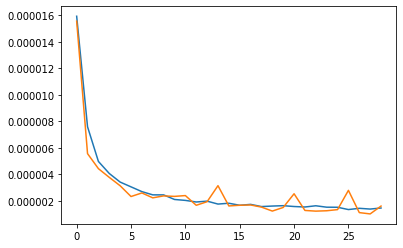

In [10]:
plt.plot(train_losses[1:])
plt.plot(val_losses[1:])
plt.show()

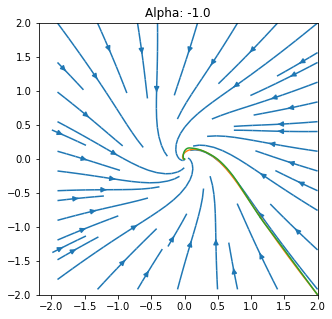

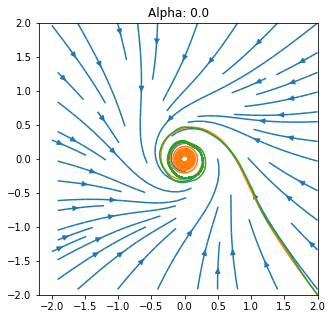

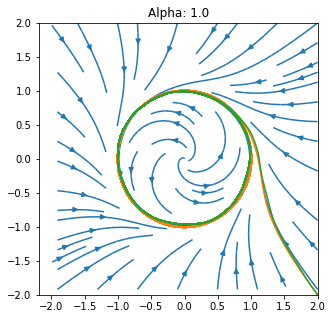

In [11]:
plot_phase_portrait(andronov_hopf, -1.0, model, 2, [2, -2])
plot_phase_portrait(andronov_hopf,  0.0, model, 2, [2, -2])
plot_phase_portrait(andronov_hopf,  1.0, model, 2, [2, -2])

x done!
y done!


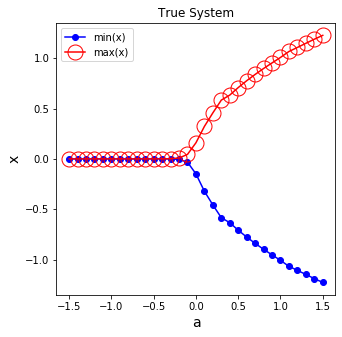

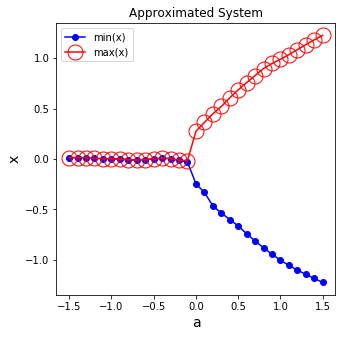

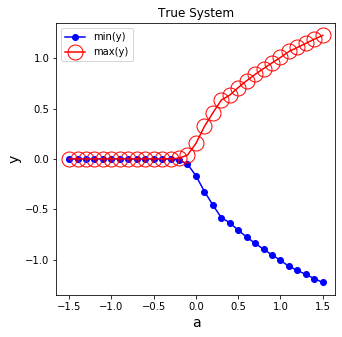

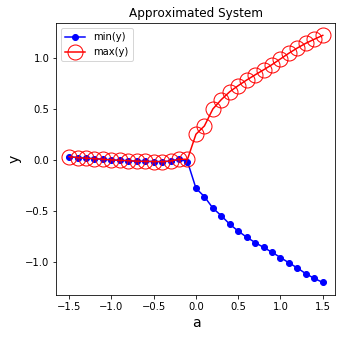

In [12]:
# Bifurcation.
alphas = np.linspace(-1.5, 1.5, 31)
x0 = [2, -2]
x_true_mm, x_model_mm = extract_min_max(vec_andronov_hopf, alphas, model, x0)
print('x done!')
y_true_mm, y_model_mm = extract_min_max(vec_andronov_hopf, alphas, model, x0, axis=1)
print('y done!')

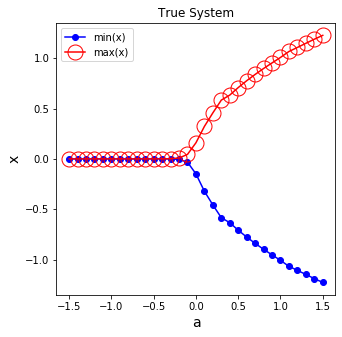

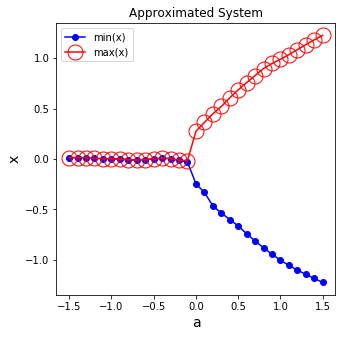

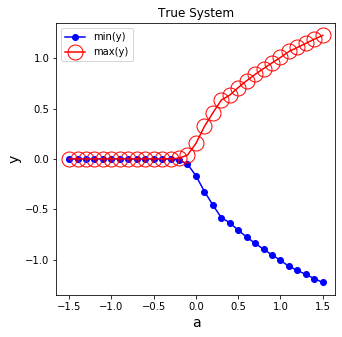

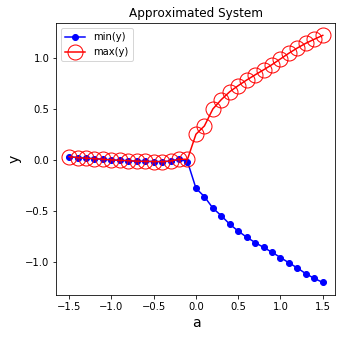

In [13]:
# x coordinate
plot_bifurcation(x_true_mm, alphas)
plot_bifurcation(x_model_mm, alphas, true_sys=False)

# y coordinate
plot_bifurcation(y_true_mm, alphas, axis='y')
plot_bifurcation(y_model_mm, alphas, true_sys=False, axis='y')

# 3. Roessler attractor

In [46]:
# Choose your network parameters.
input_size=3
num_param=1
hidden_size=200
h=1
num_hidden_layers=3

# Initialise the model.
model = EulerN(input_size, num_param, hidden_size, h, num_hidden_layers)

In [47]:
# Load data.
dataset = CSVData(csv_file_path='third_model.csv', input_size=3)
train_loader, val_loader = train_valid_loader(dataset, bs=1000)

In [48]:
# Loss & optimizer.
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.008, weight_decay=0)

# Losses.
train_losses = []
val_losses = []

In [49]:
# Training.
for epoch in range(3):  # loop over the dataset multiple times

    train_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        running_loss = 0.0
        # get the inputs; data is a list of [inputs, labels]
        inputs, params, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs, params)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss += loss.item()
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.9f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    val_loss = 0.0
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, params, labels = data

            # forward + loss 
            outputs = model(inputs, params)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
        
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    print('[Epoch: %d] training loss: %.9f  validation loss: %.9f' %
            (epoch + 1, train_loss,val_loss))
    
            

print('Finished Training')

[1,   200] loss: 0.000190671
[1,   400] loss: 0.000090138
[1,   600] loss: 0.000074035
[1,   800] loss: 0.000082148
[1,  1000] loss: 0.000019674
[1,  1200] loss: 0.000003548
[1,  1400] loss: 0.000037948
[1,  1600] loss: 0.000010318
[1,  1800] loss: 0.000017653
[1,  2000] loss: 0.000036001
[1,  2200] loss: 0.000013738
[1,  2400] loss: 0.000011626
[1,  2600] loss: 0.000016733
[1,  2800] loss: 0.000009965
[1,  3000] loss: 0.000003229
[1,  3200] loss: 0.000022754
[1,  3400] loss: 0.000004621
[1,  3600] loss: 0.000015683
[1,  3800] loss: 0.000003060
[1,  4000] loss: 0.000076037
[1,  4200] loss: 0.000018206
[1,  4400] loss: 0.000006437
[1,  4600] loss: 0.000004667
[1,  4800] loss: 0.000231757
[1,  5000] loss: 0.000011516
[1,  5200] loss: 0.000006384
[1,  5400] loss: 0.000114684
[1,  5600] loss: 0.000015693
[1,  5800] loss: 0.000013505
[1,  6000] loss: 0.000038180
[Epoch: 1] training loss: 0.013014307  validation loss: 0.006988431
[2,   200] loss: 0.000005931
[2,   400] loss: 0.000007677
[2, 

In [50]:
print('Epoch:', str(len(train_losses)))

Epoch: 3


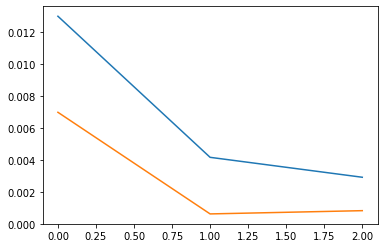

In [51]:
plt.plot(train_losses[0:])
plt.plot(val_losses[0:])
plt.show()

In [52]:
x0 = np.array([5,5,5])

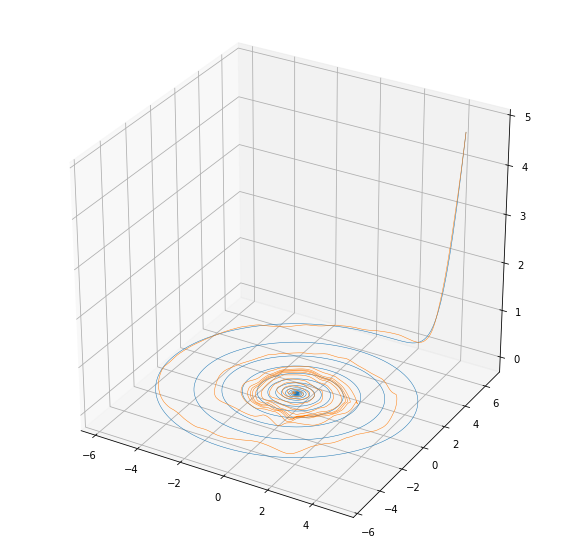

In [53]:
plot_3d_trajectory(vec_roessler_attractor, -0.1, model, x0, lw=0.5)

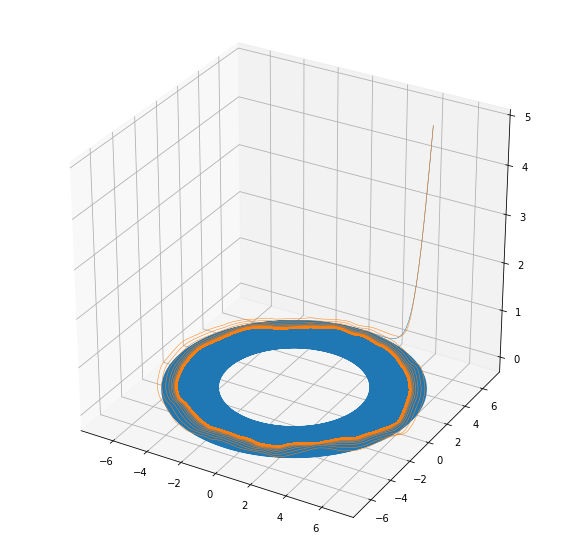

In [54]:
plot_3d_trajectory(vec_roessler_attractor,  0.0, model, x0, lw=0.5)

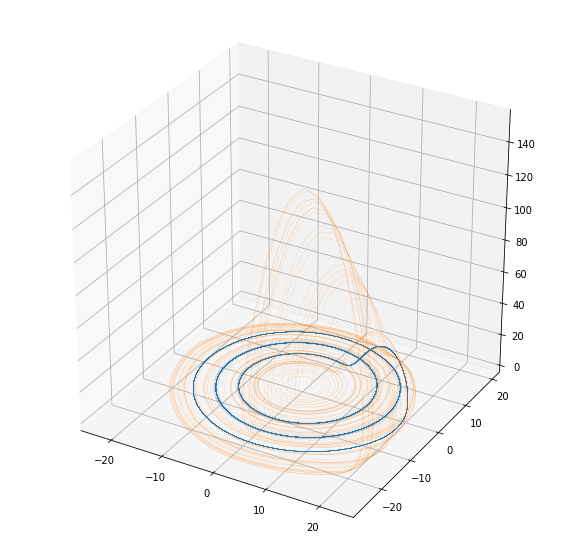

In [55]:
plot_3d_trajectory(vec_roessler_attractor,  0.1, model, x0)

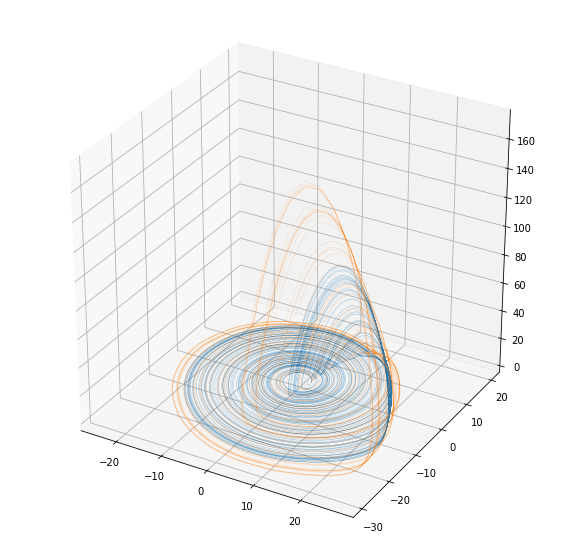

In [56]:
plot_3d_trajectory(vec_roessler_attractor,  0.2, model, x0)

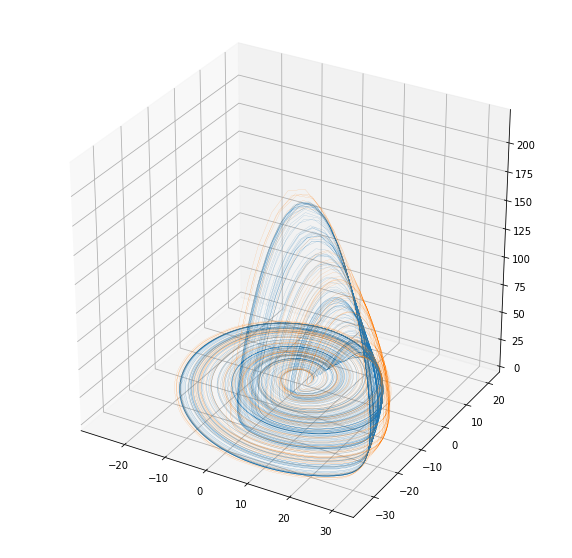

In [57]:
plot_3d_trajectory(vec_roessler_attractor,  0.3, model, x0)

In [58]:
# Bifurcation
a_s = [-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3]
x_true_mm, x_model_mm = extract_min_max(vec_roessler_attractor, a_s, model, x0)
print('x done!')
y_true_mm, y_model_mm = extract_min_max(vec_roessler_attractor, a_s, model, x0, axis=1)
print('y done!')
z_true_mm, z_model_mm = extract_min_max(vec_roessler_attractor, a_s, model, x0, axis=2)
print('z done!')

x done!
y done!
z done!


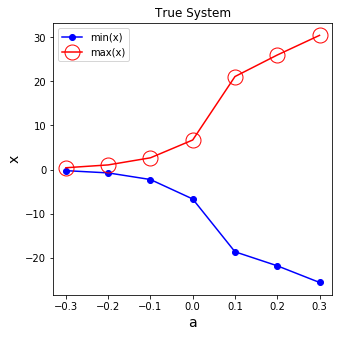

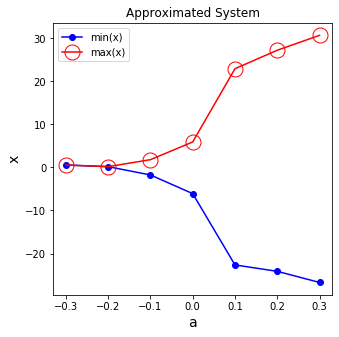

In [59]:
# x coordinate
plot_bifurcation(x_true_mm, a_s)
plot_bifurcation(x_model_mm, a_s, true_sys=False)

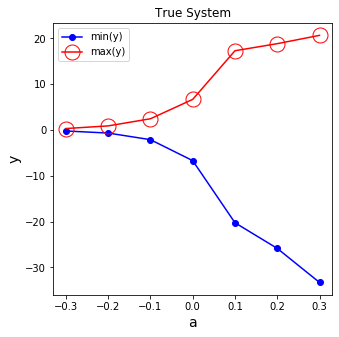

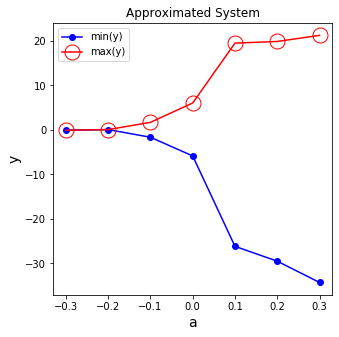

In [60]:
# y coordinate
plot_bifurcation(y_true_mm, a_s, axis='y')
plot_bifurcation(y_model_mm, a_s, true_sys=False, axis='y')

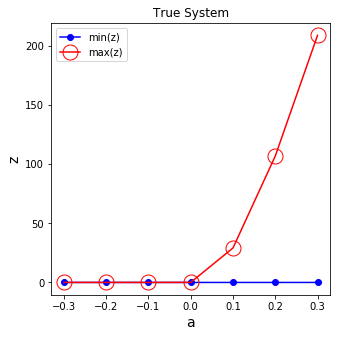

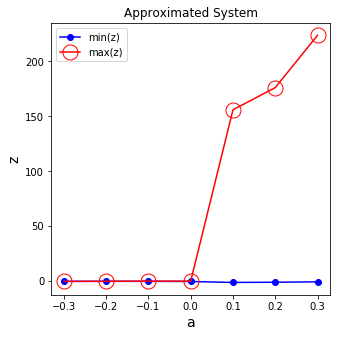

In [61]:
# z coordinate
plot_bifurcation(z_true_mm, a_s, axis='z')
plot_bifurcation(z_model_mm, a_s, true_sys=False, axis='z')